<a href="https://colab.research.google.com/github/SanchitaBora/Social-Media-Sentiment/blob/main/Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/SanchitaBora/Social-Media-Sentiment/main/train.csv")
df.head()

,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2


**Data Cleaning**

In [ ]:
# Removing punctuations, numbers and special characters
df['clean_text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df.head(10)

<ipython-input-3-ab52c9731844>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['text'].str.replace("[^a-zA-Z#]", " ")


,text,Y,clean_text
0,advice Talk neighbours family exchange phone n...,2,advice Talk neighbours family exchange phone n...
1,Coronavirus Australia: Woolworths give elderly...,2,Coronavirus Australia Woolworths give elderly...
2,"My food stock one empty... PLEASE, panic, THER...",2,My food stock one empty PLEASE panic THER...
3,"Me, ready go supermarket outbreak. Not I'm par...",0,Me ready go supermarket outbreak Not I m par...
4,As news regionÂs first confirmed COVID- case ...,2,As news region s first confirmed COVID case ...
5,Cashier grocery store sharing insights To prov...,2,Cashier grocery store sharing insights To prov...
6,Was supermarket today. Didn't buy toilet paper.,1,Was supermarket today Didn t buy toilet paper
7,Due COVID- retail store classroom Atlanta open...,2,Due COVID retail store classroom Atlanta open...
8,"For corona prevention,we stop buy things cash ...",0,For corona prevention we stop buy things cash ...
9,"All month crowding supermarkets restaurants, h...",1,All month crowding supermarkets restaurants h...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenizing the text
    tokens = word_tokenize(text)

    # Lowercase all words
    tokens = [word.lower() for word in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    # stemmer = PorterStemmer()
    # stemmed_tokens = [stemmer.stem(word) for word in tokens]

    processed_text = ' '.join(tokens)

    return processed_text

df['clean_text'] = df['clean_text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,Y,clean_text
0,advice Talk neighbours family exchange phone n...,2,advice talk neighbours family exchange phone n...
1,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths give elderly ...
2,"My food stock one empty... PLEASE, panic, THER...",2,food stock one empty please panic enough food ...
3,"Me, ready go supermarket outbreak. Not I'm par...",0,ready go supermarket outbreak paranoid food st...
4,As news regionÂs first confirmed COVID- case ...,2,news region first confirmed covid case came su...


In [ ]:
nan_values = df.isnull().sum()
nan_values

text          0
Y             0
clean_text    0
dtype: int64

**Data Visualization**

In [ ]:
# Generating WordCloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

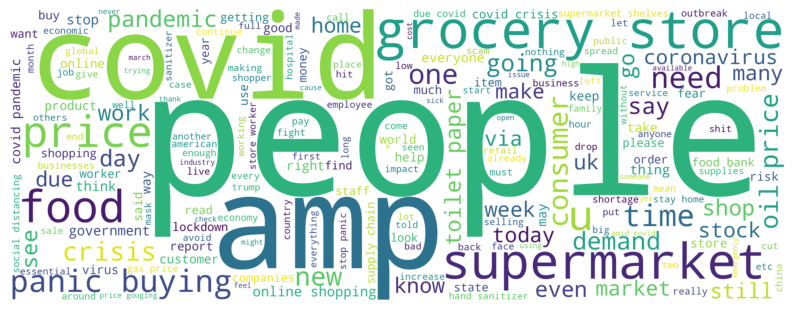

In [ ]:
# for Y=0
all_words_positive = ' '.join(text for text in df['clean_text'][df['Y']==0])

wc = WordCloud(background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(10,20))

plt.imshow(wc,interpolation="hamming")
plt.axis('off')
plt.show()

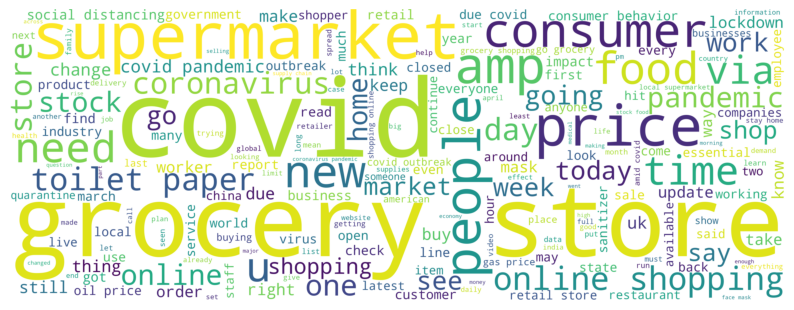

In [ ]:
# for Y=1
all_words_positive = ' '.join(text for text in df['clean_text'][df['Y']==1])

wc = WordCloud(background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(10,20))

plt.imshow(wc,interpolation="hamming")
plt.axis('off')
plt.show()

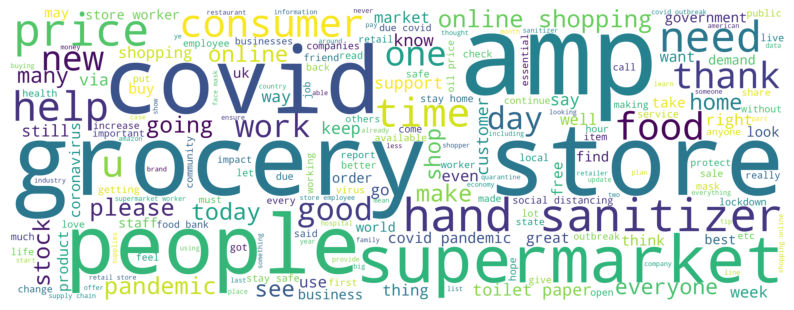

In [ ]:
# for Y=2
all_words_positive = ' '.join(text for text in df['clean_text'][df['Y']==2])

wc = WordCloud(background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(10,20))

plt.imshow(wc,interpolation="hamming")
plt.axis('off')
plt.show()

**Splitting Dataset (Train Test Split)**

In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['Y']

# spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Using pycaret to analyze different ML models**

In [ ]:
!pip install --pre pycaret

In [ ]:
from pycaret.classification import *
clf1=setup(data=df, target='Y')
cm = compare_models()

,Description,Value
0,Session id,6925
1,Target,Y
2,Target type,Multiclass
3,Original data shape,"(41152, 3)"
4,Transformed data shape,"(41152, 3)"
5,Transformed train set shape,"(28806, 3)"
6,Transformed test set shape,"(12346, 3)"
7,Categorical features,2
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.4418,0.0000,0.4418,0.4984,0.2746,0.0063,0.0488,0.4200
nb,Naive Bayes,0.4405,0.5018,0.4405,0.7307,0.2717,0.0040,0.0435,0.8530
dummy,Dummy Classifier,0.4385,0.5000,0.4385,0.1923,0.2674,0.0000,0.0000,0.5420
qda,Quadratic Discriminant Analysis,0.4342,0.5018,0.4342,0.7263,0.2657,0.0040,0.0425,0.4550
lr,Logistic Regression,0.1944,0.5084,0.1944,0.8480,0.0734,0.0068,0.0580,2.2090
svm,SVM - Linear Kernel,0.1934,0.0000,0.1934,0.7680,0.0732,0.0053,0.0426,0.4240
knn,K Neighbors Classifier,0.1924,0.5031,0.1924,0.8479,0.0694,0.0048,0.0480,1.6530
rf,Random Forest Classifier,0.1924,0.5043,0.1924,0.8479,0.0694,0.0048,0.0480,1.0730
ada,Ada Boost Classifier,0.1924,0.5031,0.1924,0.8479,0.0694,0.0048,0.0480,0.9480
et,Extra Trees Classifier,0.1901,0.5092,0.1901,0.8479,0.0648,0.0027,0.0359,0.9370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Using TF-IDF Vectorizer**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

**Using Logistic Regression**

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3113
           1       0.77      0.67      0.71      1488
           2       0.83      0.88      0.86      3630

    accuracy                           0.82      8231
   macro avg       0.81      0.79      0.80      8231
weighted avg       0.82      0.82      0.82      8231



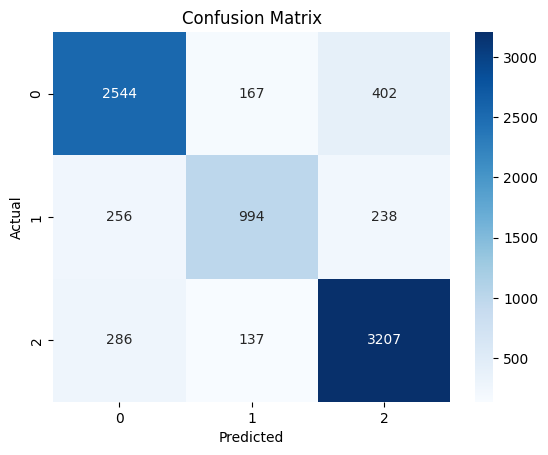

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

log_f1 = f1_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Using Naive Bayes**

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3113
           1       0.85      0.03      0.06      1488
           2       0.61      0.91      0.73      3630

    accuracy                           0.66      8231
   macro avg       0.74      0.54      0.50      8231
weighted avg       0.71      0.66      0.60      8231



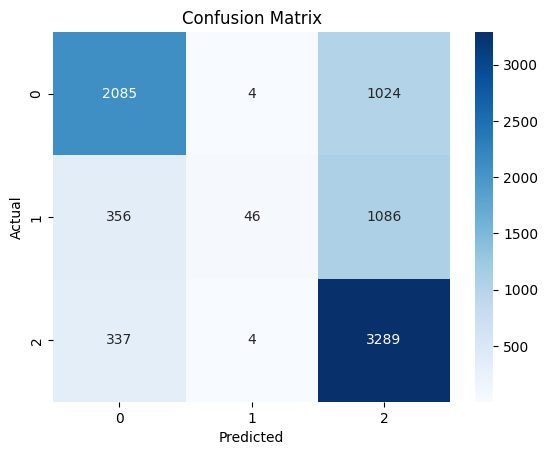

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

nb_f1 = f1_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Using Ridge Classifier**

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3113
           1       0.73      0.64      0.68      1488
           2       0.83      0.87      0.85      3630

    accuracy                           0.81      8231
   macro avg       0.79      0.78      0.78      8231
weighted avg       0.81      0.81      0.81      8231



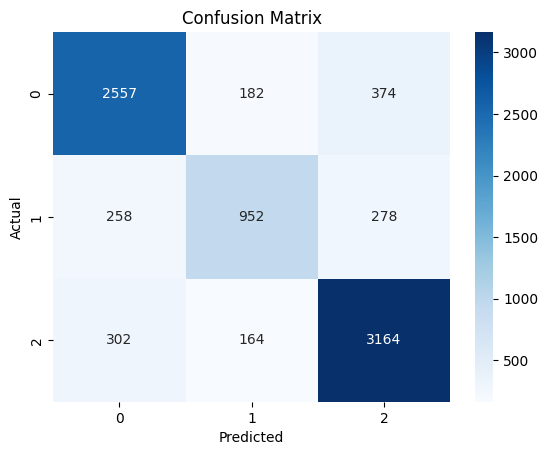

In [ ]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

ridge_f1 = f1_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.04      0.08      3113
           1       0.19      0.99      0.31      1488
           2       0.88      0.04      0.07      3630

    accuracy                           0.21      8231
   macro avg       0.65      0.36      0.15      8231
weighted avg       0.76      0.21      0.12      8231



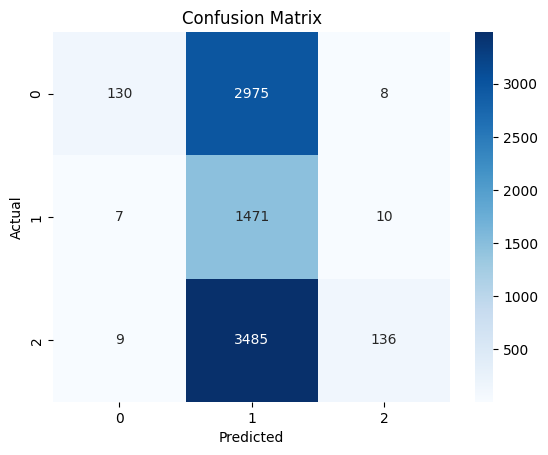

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

kmeans_f1 = f1_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Analysis of all the models used**

In [ ]:
Algo_1 = ['LogisticRegression','RidgeClassifier','NaiveBayes','KMeansClustering']

score_1 = [log_f1,ridge_f1,nb_f1,kmeans_f1]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,5)])

compare_1.T

,1,2,3,4
Model,LogisticRegression,RidgeClassifier,NaiveBayes,KMeansClustering
F1_Score,0.817737,0.808802,0.5998,0.105882


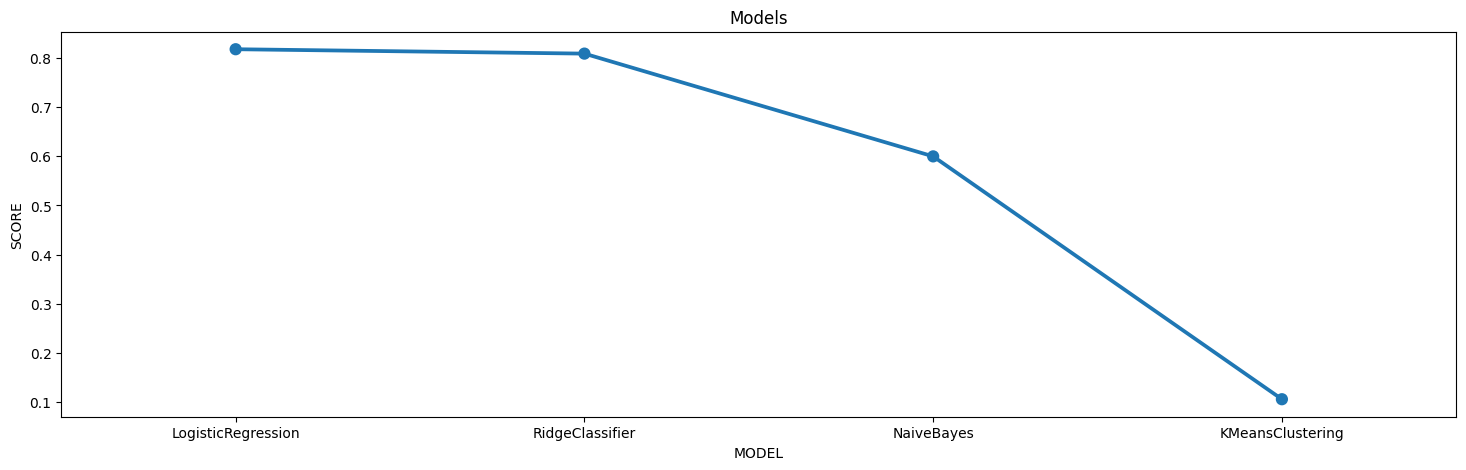

In [ ]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Model')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()